# 6.5 Unsupervised Machine Learning: Clustering

# 1. Install and import all necessary libraries in your Jupyter notebook.

In [5]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

# 2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).
Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.
Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

In [9]:
#Import latest version of the data frame
df_realtor = pd.read_pickle('/Users/ariedlin/Desktop/Career Foundry Assignments/6.1-6.7/Real Estate Project/2. Data/df_realtor_6.4')

In [11]:
df_realtor.head()

,price,bed,bath,acre_lot,state,house_size,price_range
3403,180000,2,1,0.34,Massachusetts,676.0,Low Range
3405,169900,2,2,0.21,Massachusetts,892.0,Low Range
3406,242000,2,2,0.21,Massachusetts,1428.0,Low Range
3407,299950,2,2,0.21,Massachusetts,1659.0,Low Range
3408,239900,3,1,0.46,Massachusetts,1196.0,Low Range


In [13]:
#Create a subset of the data including only numerical values
df_realtor_num = df_realtor.select_dtypes(include=['number'])

#Print the head to ensure it worked
df_realtor_num.head()

,price,bed,bath,acre_lot,house_size
3403,180000,2,1,0.34,676.0
3405,169900,2,2,0.21,892.0
3406,242000,2,2,0.21,1428.0
3407,299950,2,2,0.21,1659.0
3408,239900,3,1,0.46,1196.0


# 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [16]:
#Define the range of potential clusters in the data.
num_cl = range(1, 10) 

#Define k-means clusters within the range
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [18]:
#Find k-means score for each number in the defined range
score = [kmeans[i].fit(df_realtor_num).score(df_realtor_num) for i in range(len(kmeans))] 

#Check to see scores
score

[-8.24643651663372e+16,
 -2.63754782472546e+16,
 -1.2669516028118804e+16,
 -7598935408060452.0,
 -4827705431854799.0,
 -3644981795175002.5,
 -2646698804462607.5,
 -1989599644714651.0,
 -1612205398535514.5]

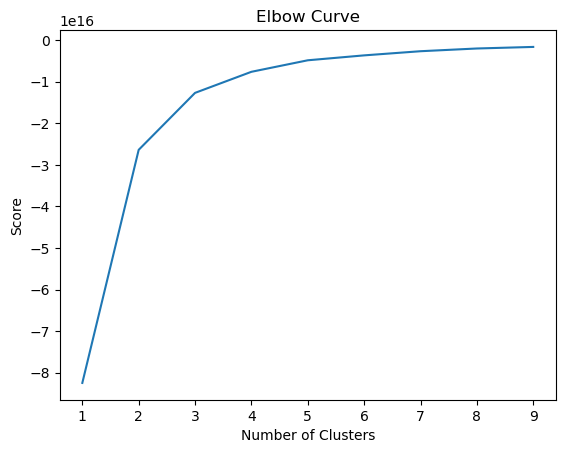

In [20]:
#Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
Explain why you chose that number in a markdown cell.

This one looks a bit trickier than the example.  The 'elbow' bends a bit sharper on 2 and 3 clusters and then levels out gradually.  It looks to me like 3 clusters is the optimal amount because that is the last major bend before it flattens out.  The bends from 4 on are very minimal.

# 5. Run the k-means algorithm.

In [27]:
#Create the k-means object
kmeans = KMeans(n_clusters = 3)

In [29]:
#Fit the k-means object to the data
kmeans.fit(df_realtor_num)

KMeans(n_clusters=3)

# 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [31]:
df_realtor_num['clusters'] = kmeans.fit_predict(df_realtor_num)

In [35]:
#Check to see if it worked
df_realtor_num.head()

,price,bed,bath,acre_lot,house_size,clusters
3403,180000,2,1,0.34,676.0,0
3405,169900,2,2,0.21,892.0,0
3406,242000,2,2,0.21,1428.0,0
3407,299950,2,2,0.21,1659.0,0
3408,239900,3,1,0.46,1196.0,0


In [37]:
#Check value counts of the clusters
df_realtor_num['clusters'].value_counts()

clusters
0    718317
2    583010
1    251061
Name: count, dtype: int64

# 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

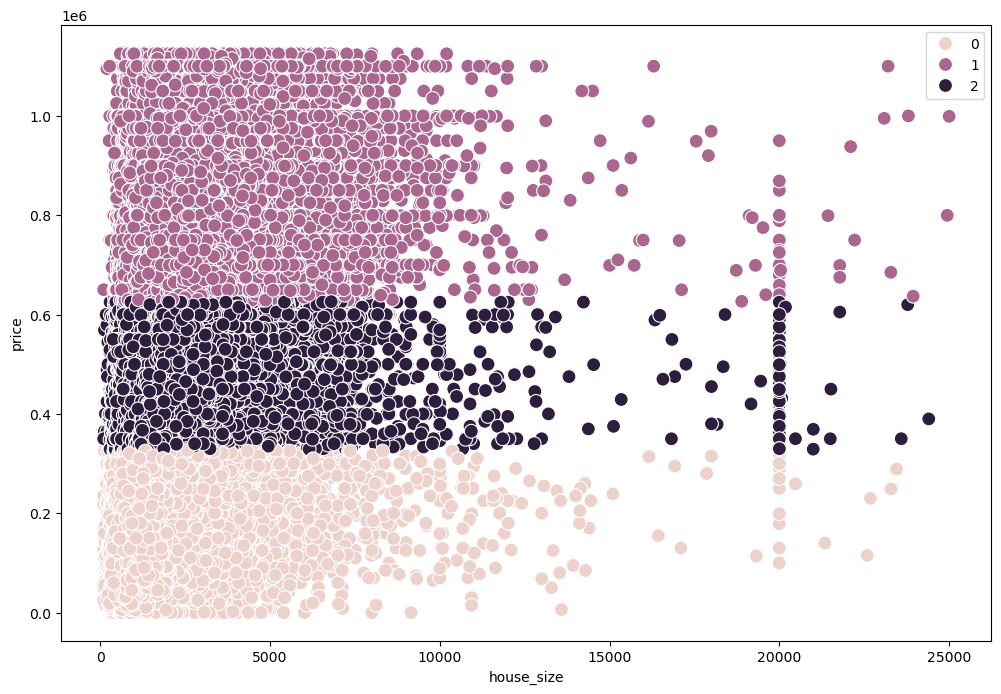

In [39]:
#Plot the clusters for the 'price' and 'house_size' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_realtor_num['house_size'], y=df_realtor_num['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('house_size') 
plt.ylabel('price') 
plt.show()

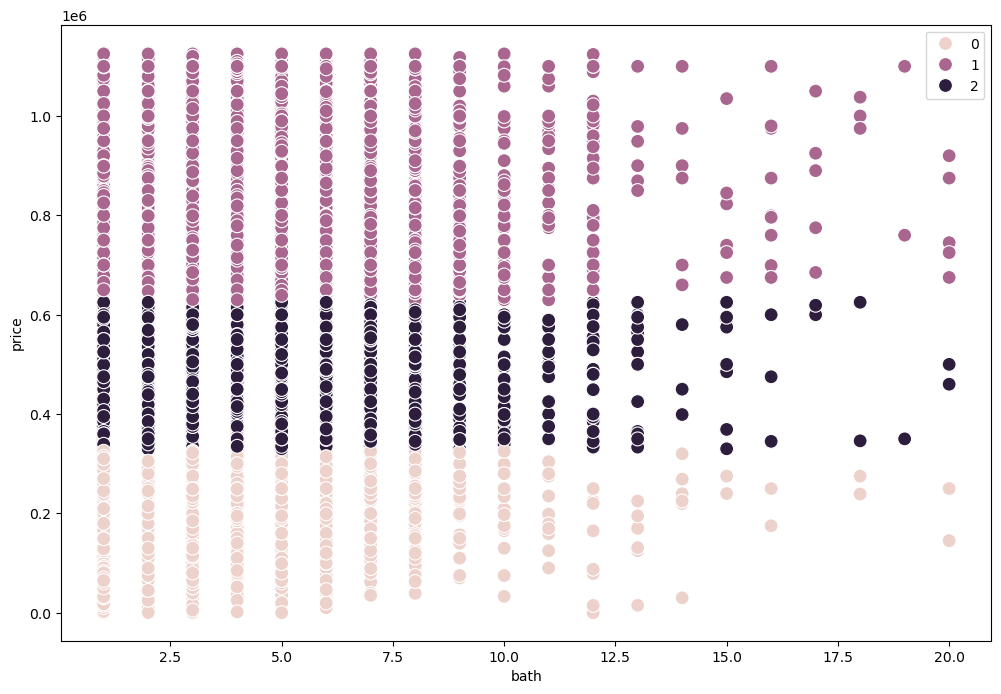

In [43]:
#Plot the clusters for the 'bath' and 'price' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_realtor_num['bath'], y=df_realtor_num['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('bath') 
plt.ylabel('price') 
plt.show()

# 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
Note down your thoughts in a markdown cell.

These clusters make sense to me.  They are distributed very evenly without much overlap from one cluster to another.  The most populated cluster in both scatterplots is the bottom one where the vales are smaller (less bathrooms, smaller house_size, price, etc).  This makes sense becasue there are likely to be more listings for normal houses with 1-3 bathrooms and less than 5,000 square feet.

# 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [52]:
df_realtor_num.loc[df_realtor_num['clusters'] == 2, 'cluster'] = 'dark purple'
df_realtor_num.loc[df_realtor_num['clusters'] == 1, 'cluster'] = 'purple'
df_realtor_num.loc[df_realtor_num['clusters'] == 0, 'cluster'] = 'pink'

In [54]:
df_realtor_num.groupby('cluster').agg({'price':['mean', 'median'], 
                         'bed':['mean', 'median'], 
                         'bath':['mean', 'median'],
                          'house_size':['mean', 'median']})

price                 bed             bath         \
                      mean    median      mean median      mean median   
cluster                                                                  
dark purple  450599.376122  439000.0  3.342999    3.0  2.582757    3.0   
pink         203410.541257  210000.0  2.885480    3.0  1.935368    2.0   
purple       802177.873891  776290.0  3.610907    4.0  3.006747    3.0   

              house_size          
                    mean  median  
cluster                           
dark purple  2039.153100  1897.0  
pink         1506.924915  1448.0  
purple       2471.132629  2258.0

It looks like some of these variables are right skewed by some high outliers (even though many of them have been removed).  For instance in cluster 1 (purple), price shows a median value of 776,290 and an average value of 802,177.  This means that there are still some extremely high values for the price variable, making the average much higher than the median. The bath variable is acutally really close for median and average, and this is likely due to the fact that I removed all of the extreme outliers with more than 20 bathrooms.

# 10. Propose what these results could be useful for in future steps of an analytics pipeline.

These clusters could be useful for identifying or grouping toghether similar type listings.  For instance, the name of cluster 1 (purple) could be 'Luxury Properties' and cluster 0 (pink) could be 'Budget Friendly Homes'.  This could help real estate agents create targeted marketing strategies.  Listings falling into cluster 0 ('Budget Friendly Homes') could be marketed to first time home buyers and anyone looking for an affordable home.  Real estate agents could ensure that listings falling into cluster 1 ('Luxury Properties') are marketed toward more wealthy buyers.

Also, running the descriptive statistics can help identify outliers in the data (which it did for me here). 

In [64]:
#Save the df_realtor_num dataset in case it is needed again

df_realtor_num.to_pickle('/Users/ariedlin/Desktop/Career Foundry Assignments/6.1-6.7/Real Estate Project/2. Data/df_realtor_num')